# Classification

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [2]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory Data Analysis

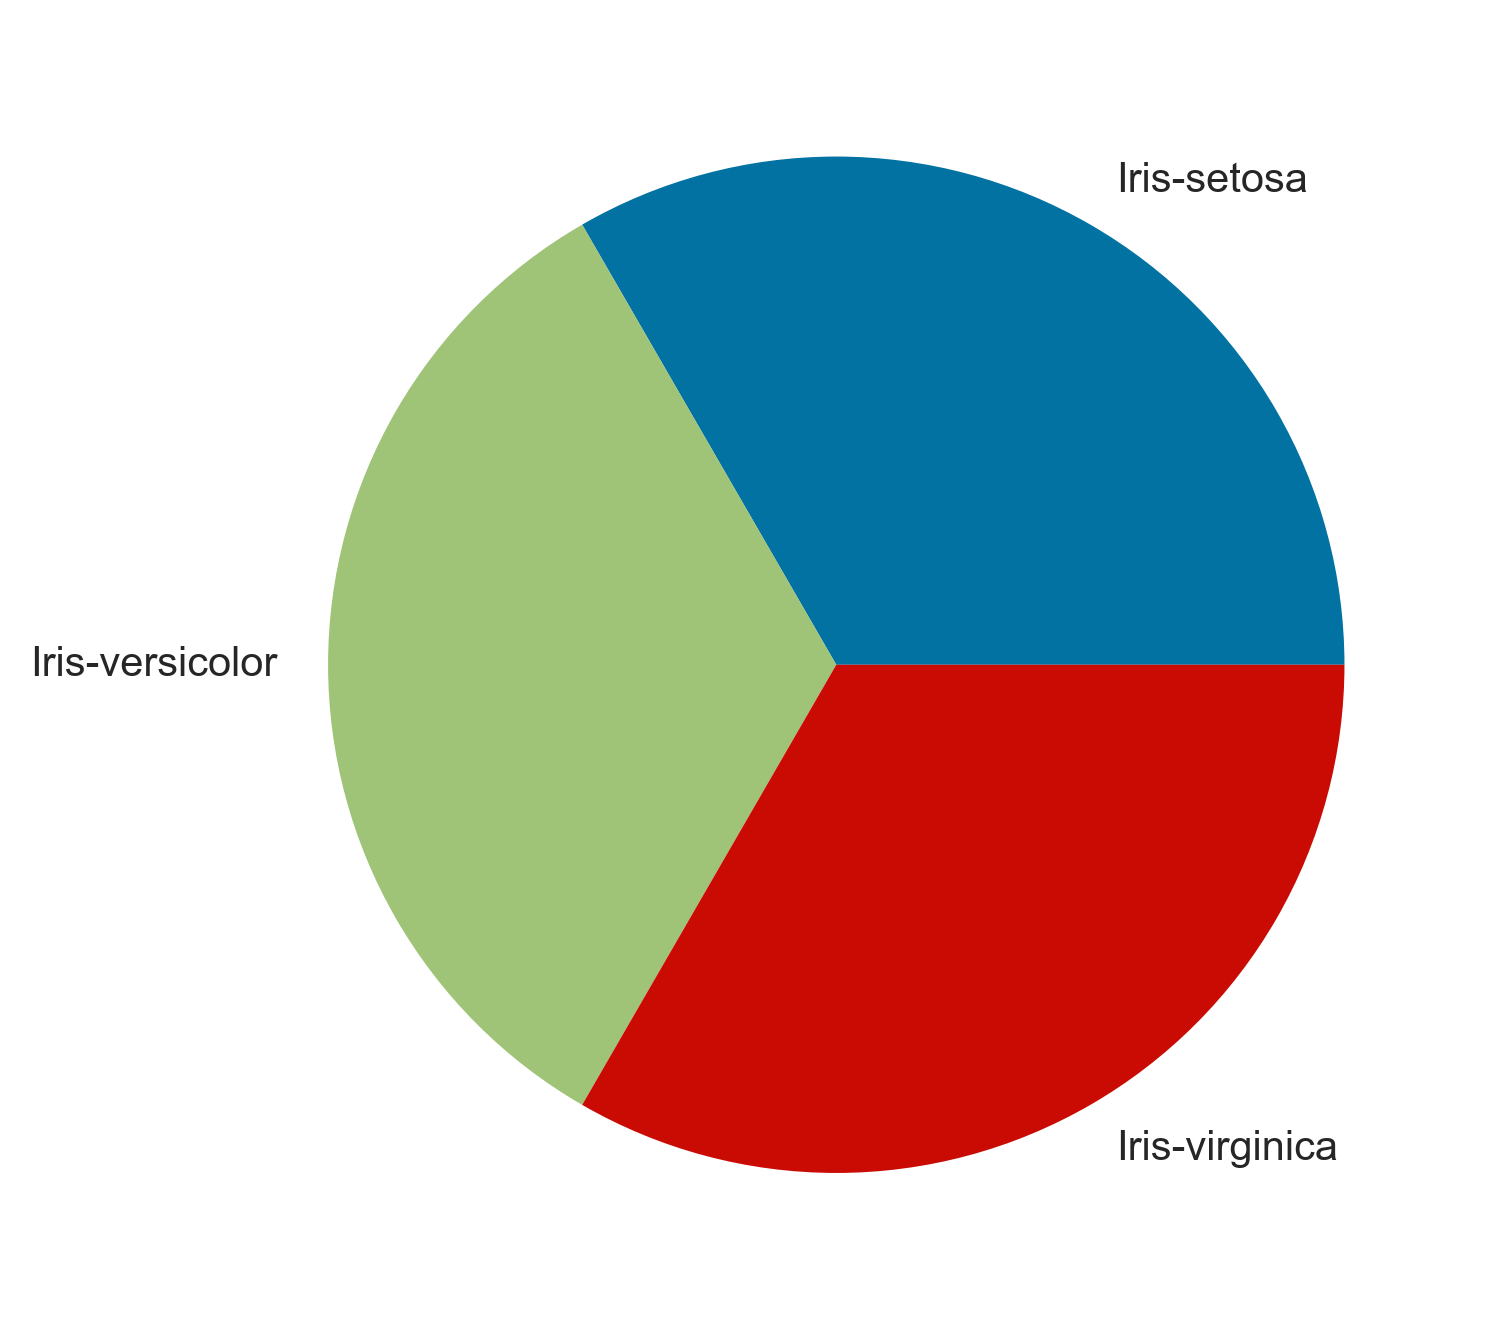

In [4]:
data['species'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

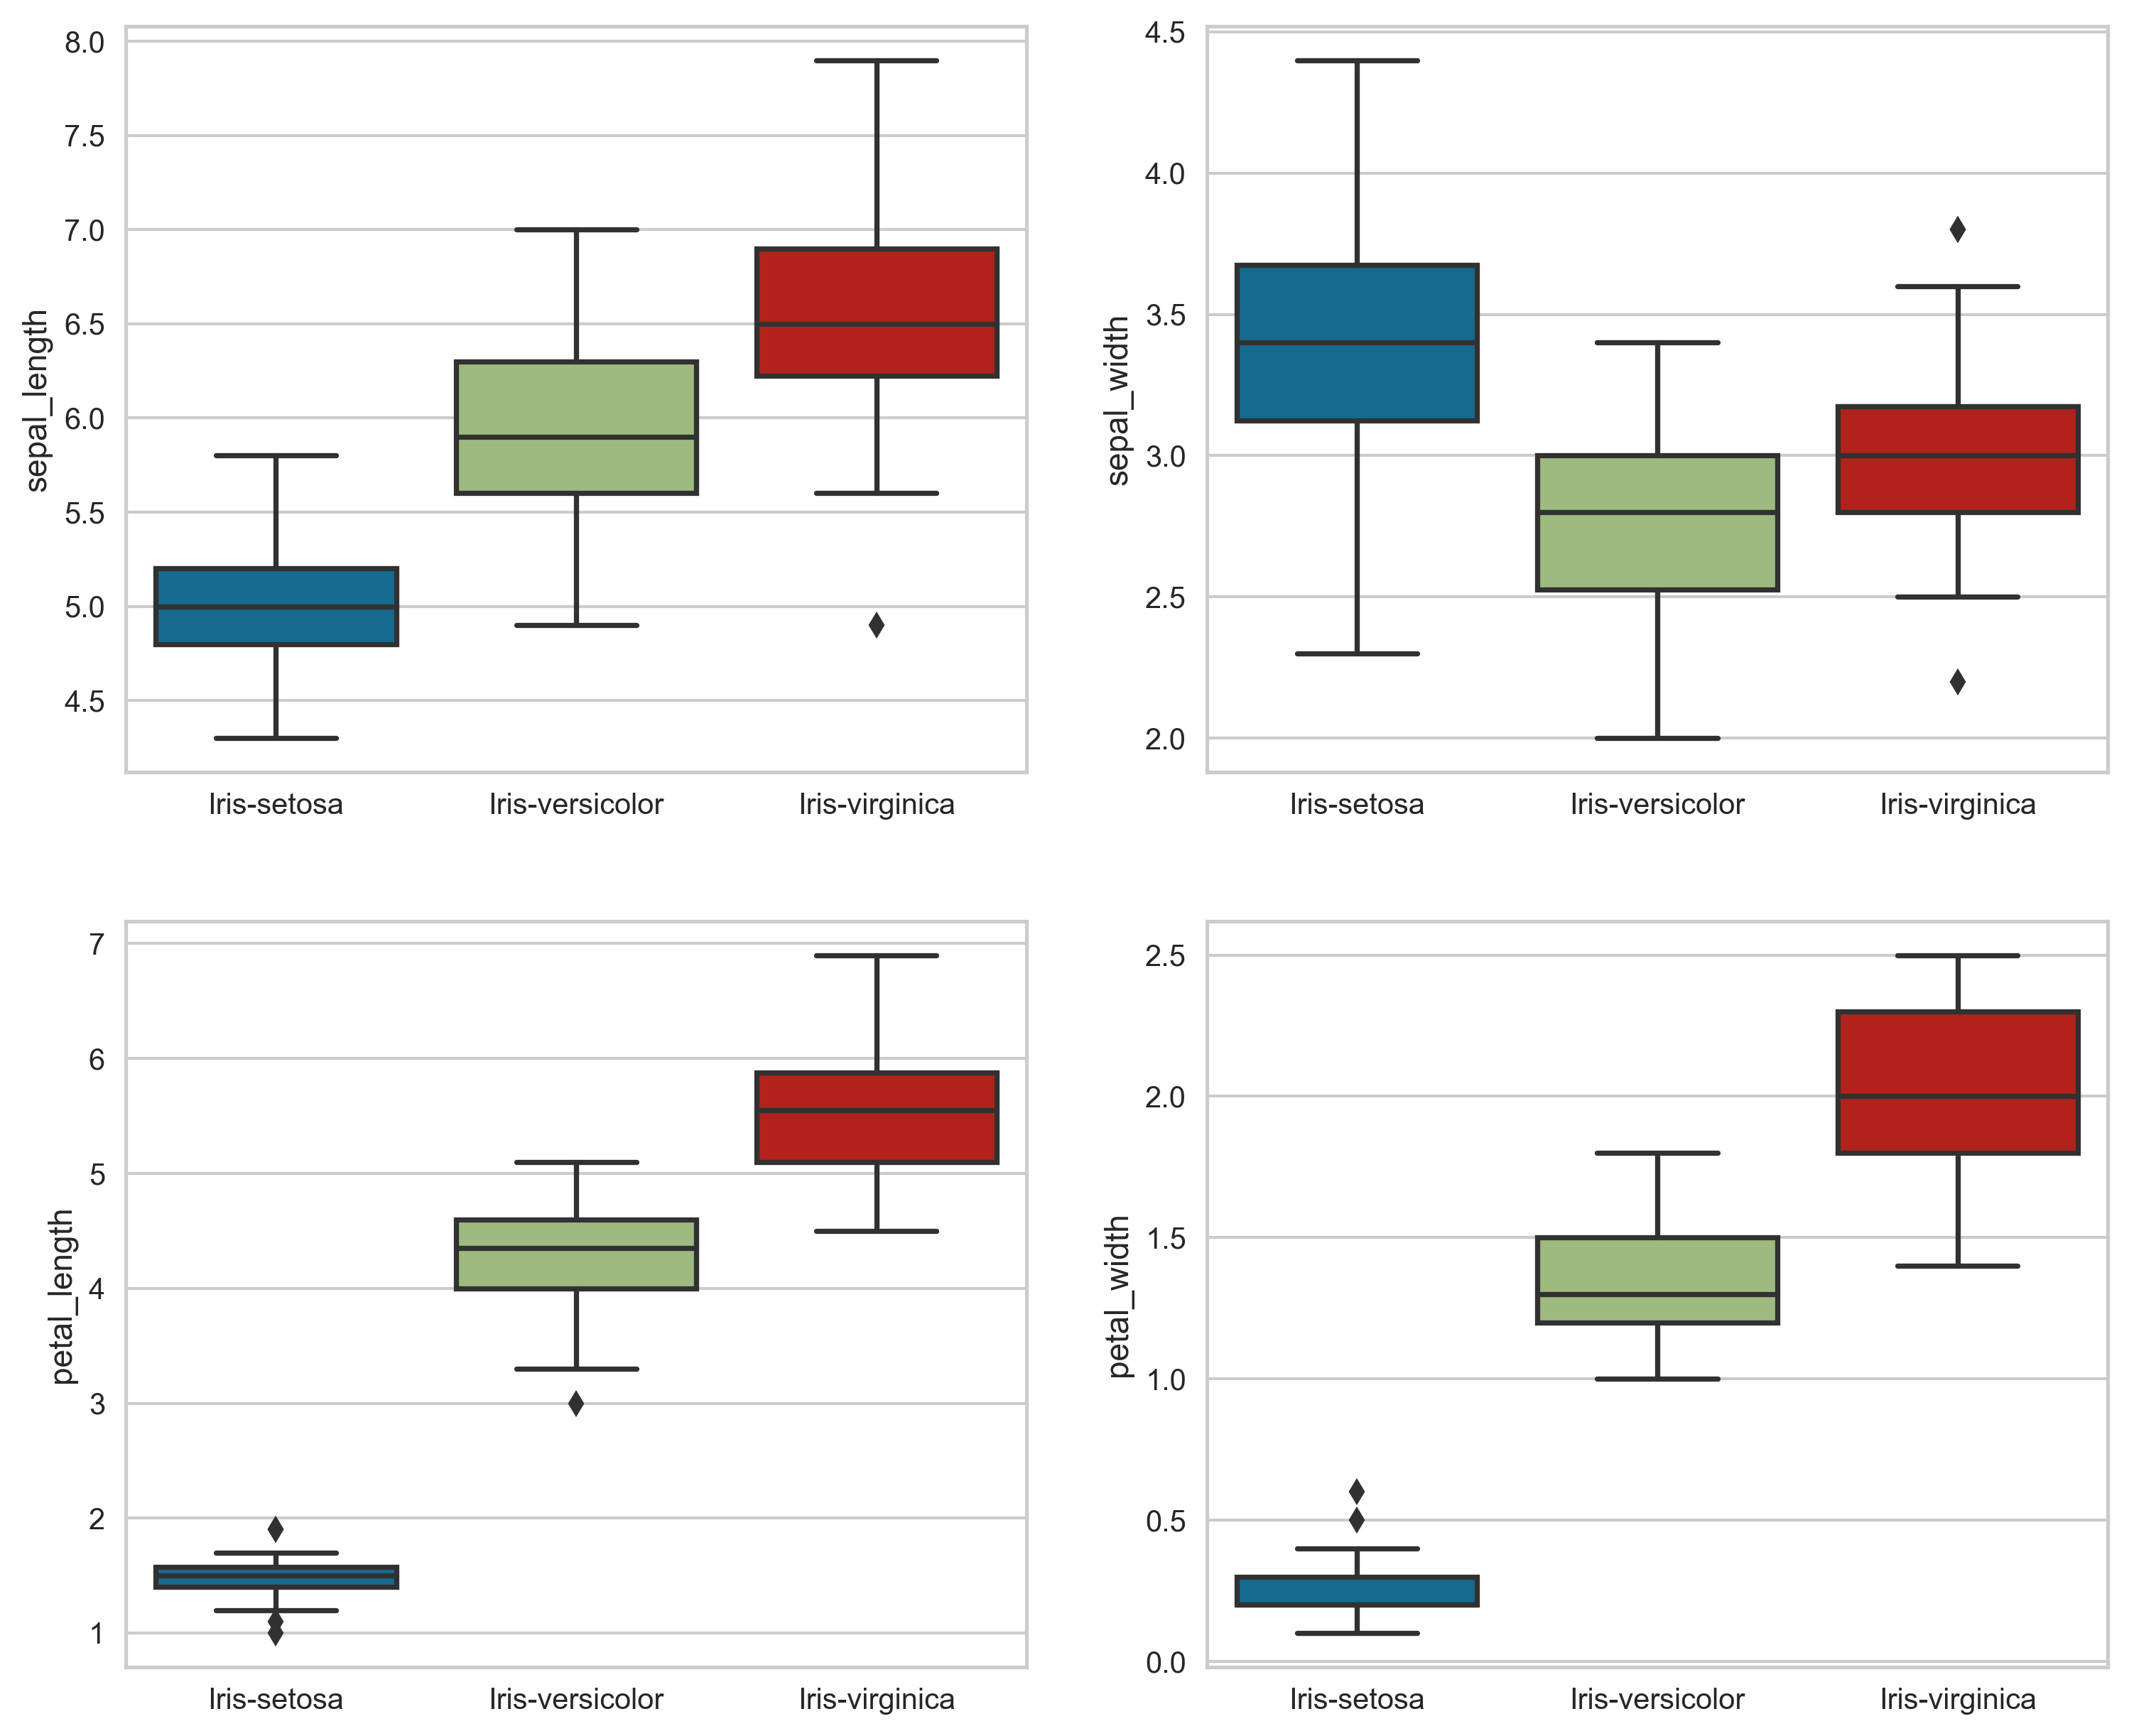

In [5]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

for ax, col in zip(axes.flatten(), data.columns) :
    sns.boxplot(data = data, x = 'species', y = col, ax = ax)
    ax.set_xlabel('')

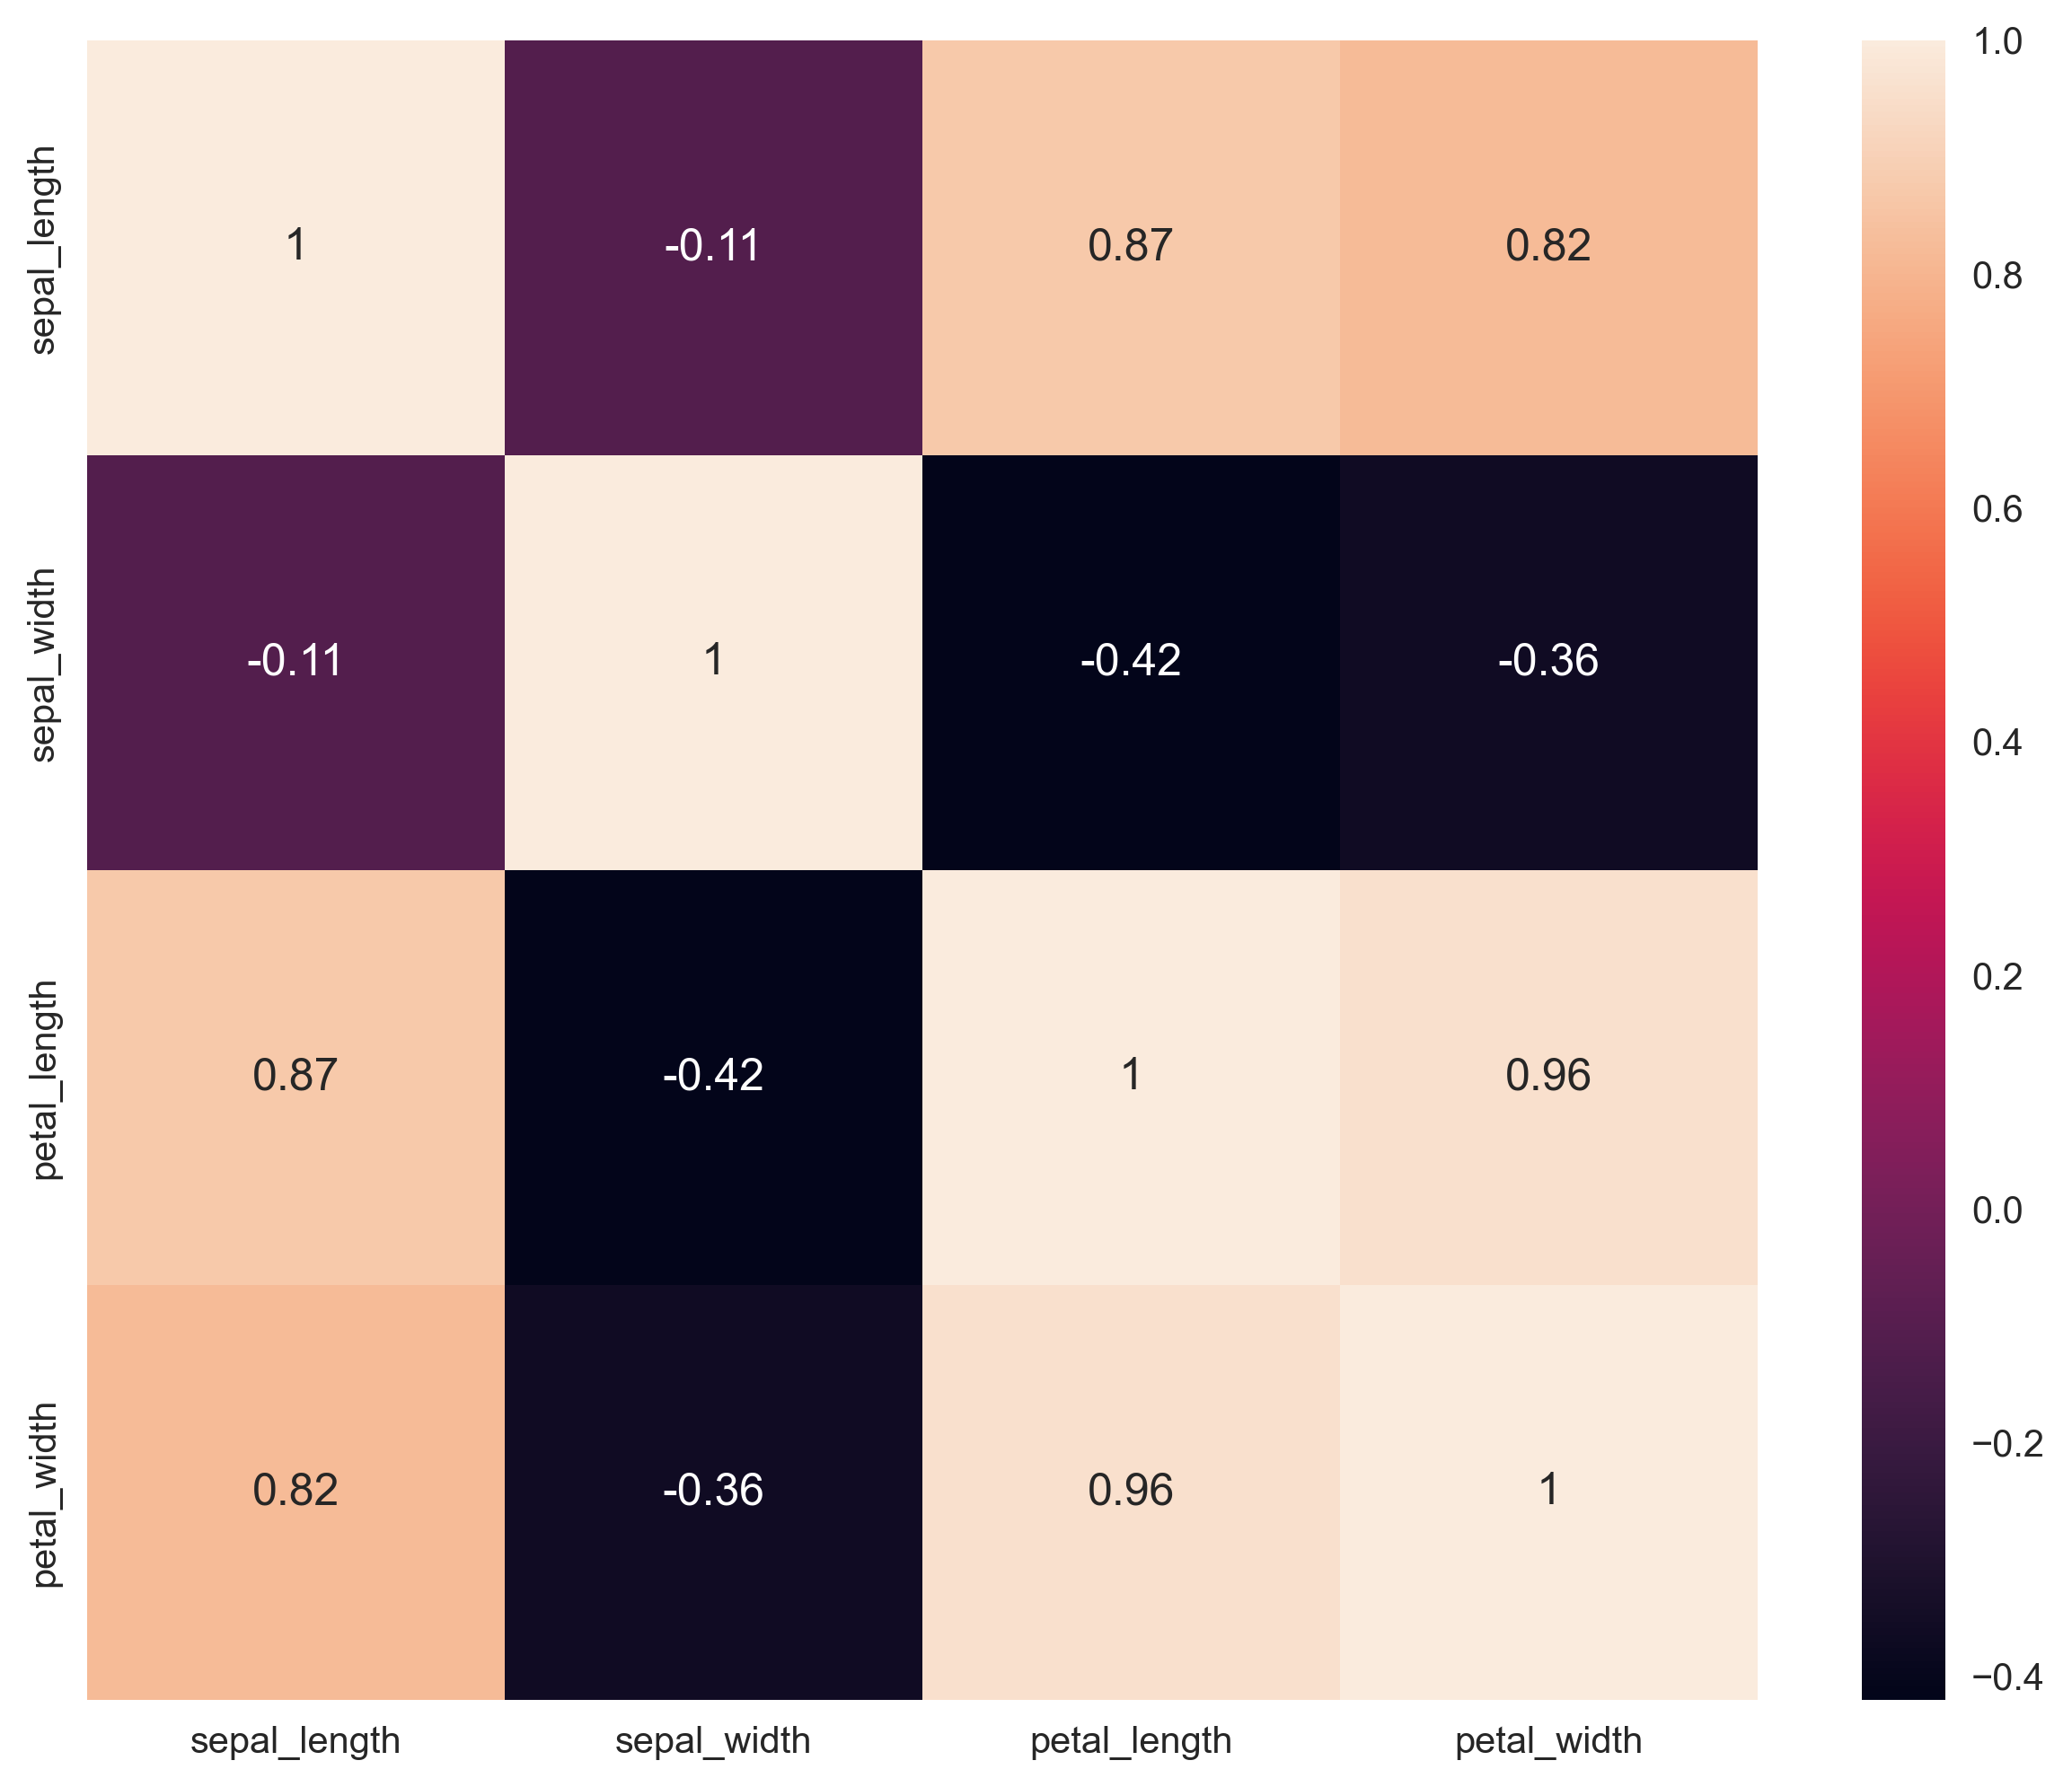

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

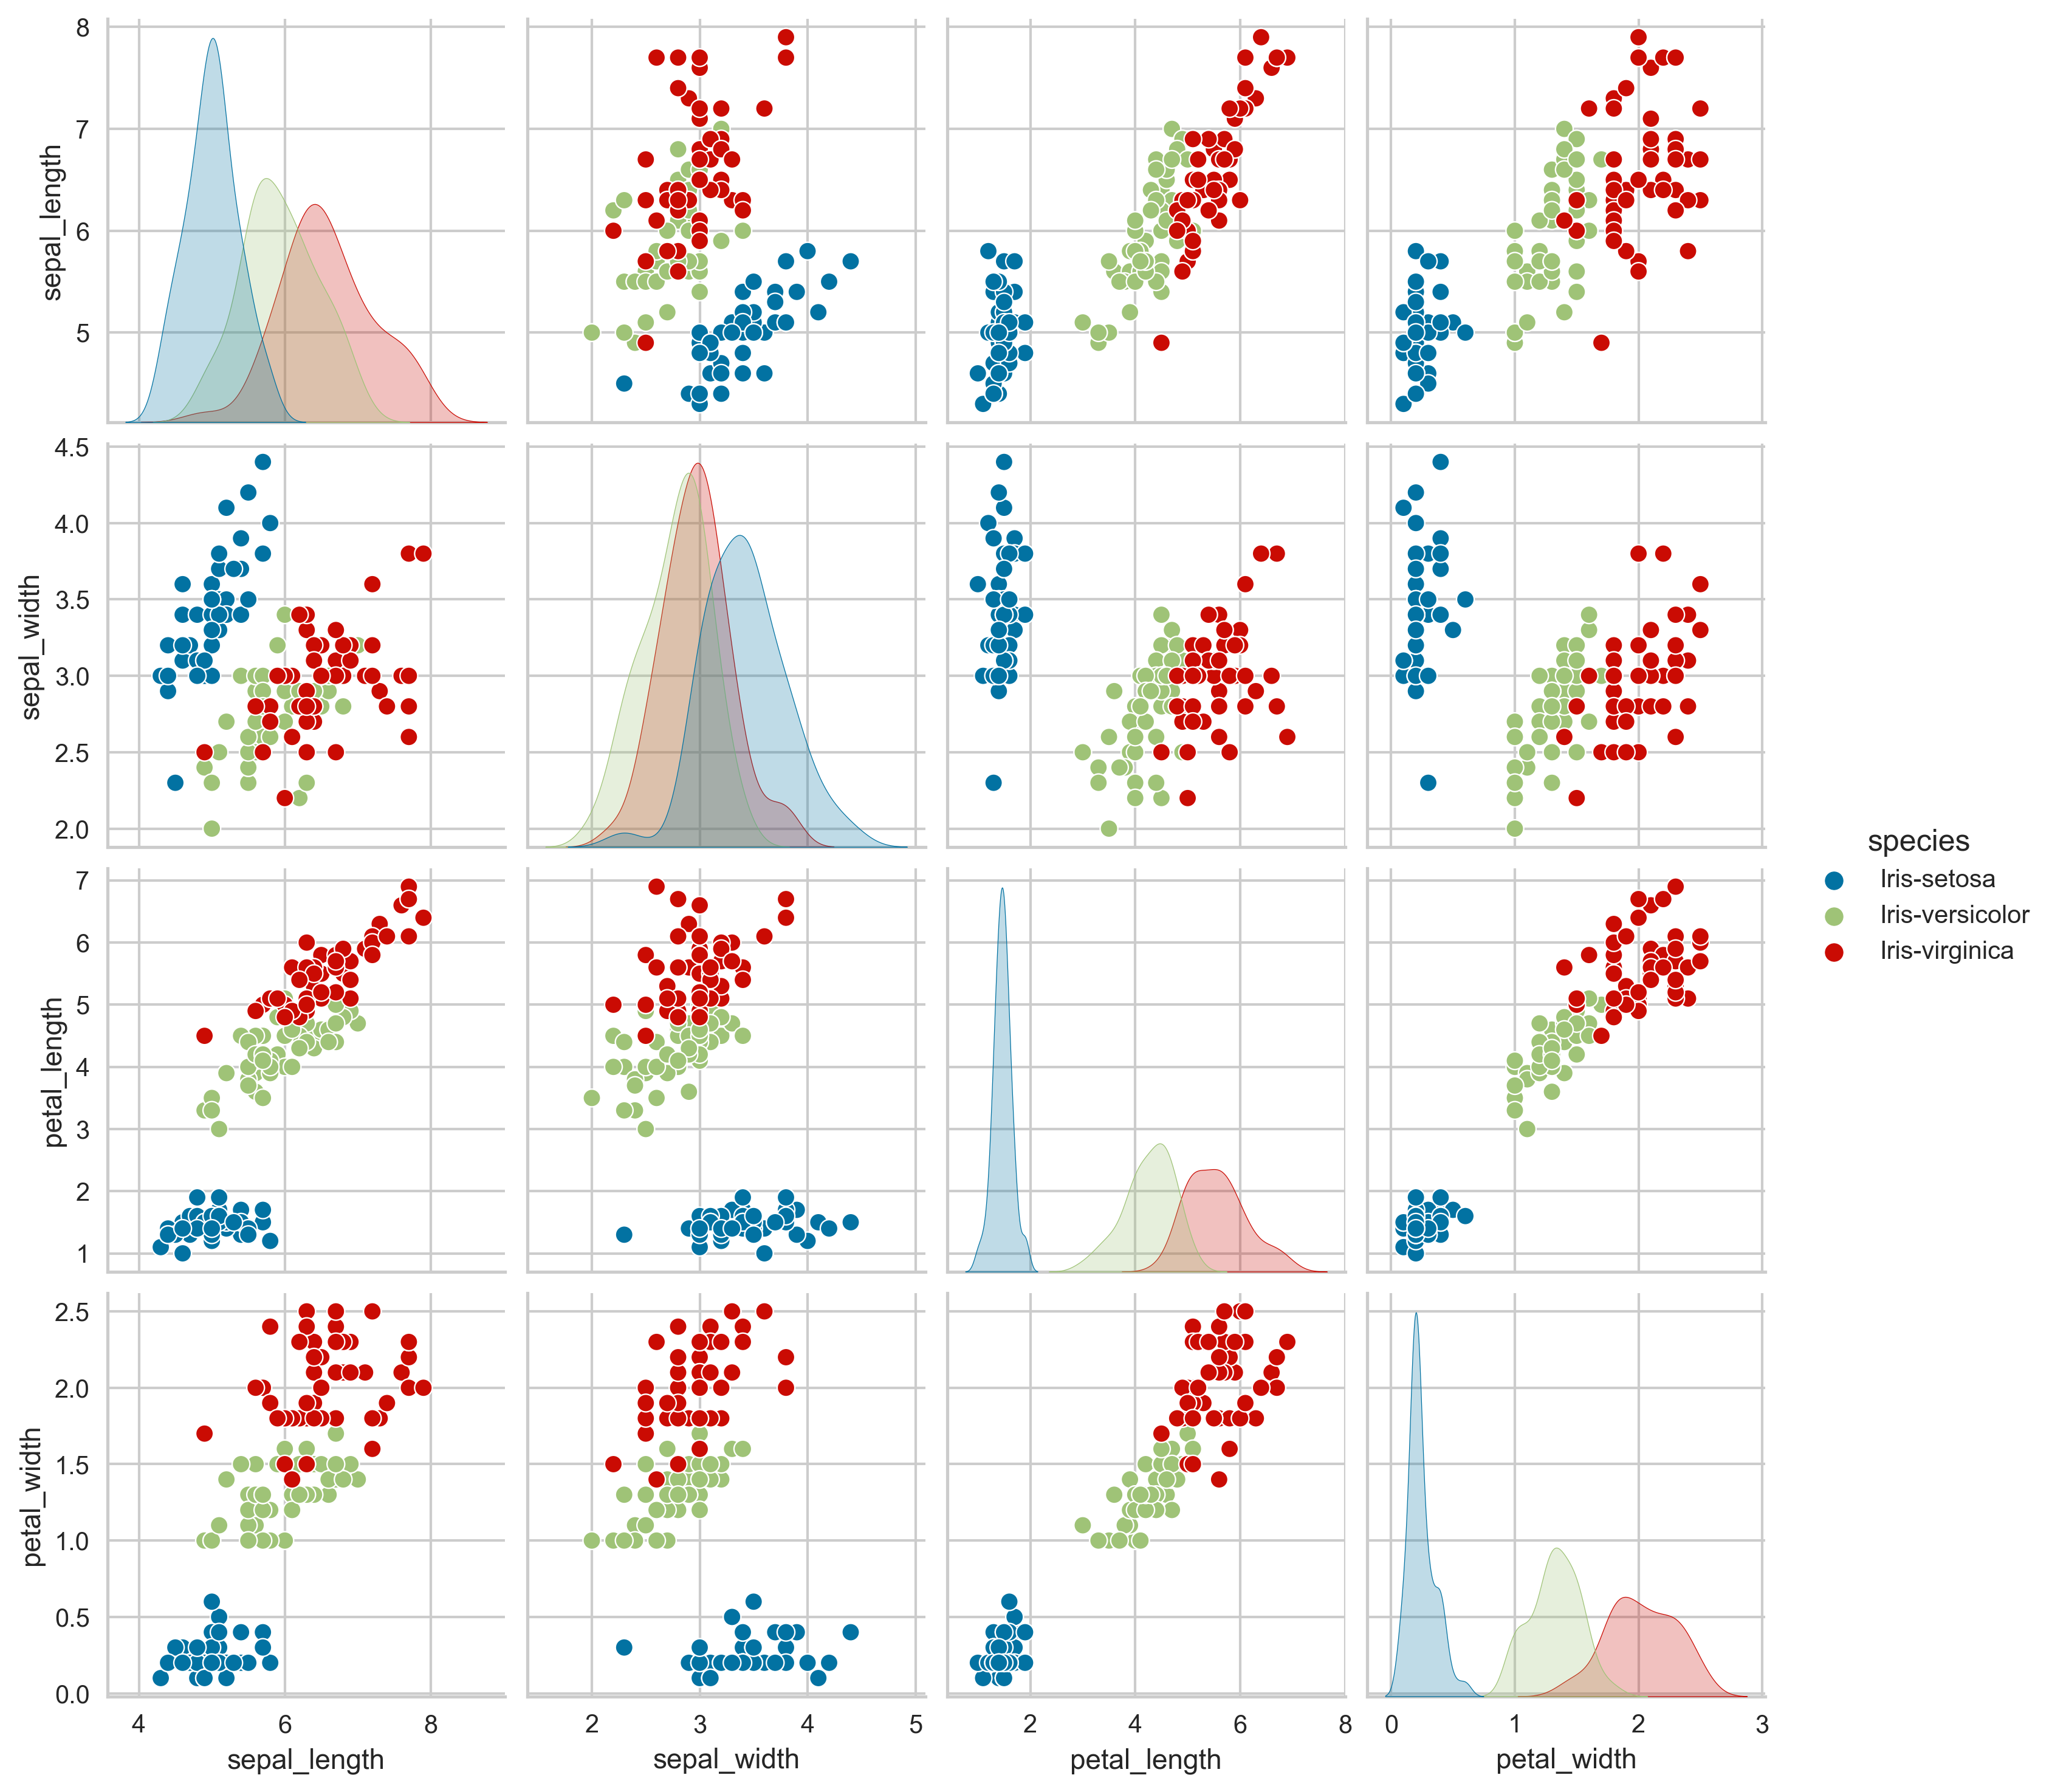

In [7]:
sns.pairplot(data, hue='species')
plt.show()

### Initializing the PyCaret Environment

In [8]:
classf = setup(data = data, target = 'species', train_size = 0.8,
               normalize = True, session_id = 3934)

,Description,Value
0,Session id,3934
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(120, 5)"
7,Transformed test set shape,"(30, 5)"
8,Numeric features,4
9,Preprocess,True


### Comparing Classification Models

In [9]:
compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9833,1.0000,0.9833,0.9867,0.9831,0.9750,0.9769,0.3400
qda,Quadratic Discriminant Analysis,0.9750,1.0000,0.9750,0.9822,0.9738,0.9625,0.9668,0.3370
lr,Logistic Regression,0.9667,0.9979,0.9667,0.9733,0.9661,0.9500,0.9537,0.6200
knn,K Neighbors Classifier,0.9667,0.9979,0.9667,0.9756,0.9653,0.9500,0.9552,0.4900
gbc,Gradient Boosting Classifier,0.9667,0.9885,0.9667,0.9700,0.9664,0.9500,0.9519,0.3730
nb,Naive Bayes,0.9583,0.9938,0.9583,0.9689,0.9568,0.9375,0.9436,0.3220
et,Extra Trees Classifier,0.9583,0.9927,0.9583,0.9689,0.9568,0.9375,0.9436,0.3660
xgboost,Extreme Gradient Boosting,0.9583,0.9854,0.9583,0.9724,0.9540,0.9375,0.9462,0.4470
dt,Decision Tree Classifier,0.9500,0.9625,0.9500,0.9657,0.9455,0.9250,0.9346,0.3330
rf,Random Forest Classifier,0.9417,0.9917,0.9417,0.9467,0.9390,0.9125,0.9175,0.3720


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

### Creating the Model

In [10]:
model = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning the Model

In [11]:
model_cat = create_model('catboost', verbose = False)

params = {'iterations': np.arange(100, 1000, 100),
         'max_depth': np.arange(1, 10),
         'learning_rate': np.arange(0.01, 1, 0.01),  
         'random_strength': np.arange(0.1, 1.0, 0.1),
         'l2_leaf_reg': np.arange(1, 100),
         'border_count': np.arange(1, 256)}

tuned_model = tune_model(model_cat, optimize = 'Accuracy', fold = 10,
            tuner_verbose = False, search_library = 'scikit-optimize',
            custom_grid = params, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.7500,0.8333,0.7500,0.8571,0.7091,0.6250,0.6934
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

### Making Predictions

In [12]:
predictions = predict_model(model)

predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9667,1.0000,0,0,0,0.9500,0.9516


,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
47,4.6,3.2,1.4,0.2,Iris-setosa,Iris-setosa,1.0000
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
53,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,0.9996
131,7.9,3.8,6.4,2.0,Iris-virginica,Iris-virginica,0.9994
109,7.2,3.6,6.1,2.5,Iris-virginica,Iris-virginica,1.0000
37,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
57,4.9,2.4,3.3,1.0,Iris-versicolor,Iris-versicolor,1.0000
31,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa,1.0000
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,1.0000
141,6.9,3.1,5.1,2.3,Iris-virginica,Iris-virginica,0.9992


### Plotting the Model

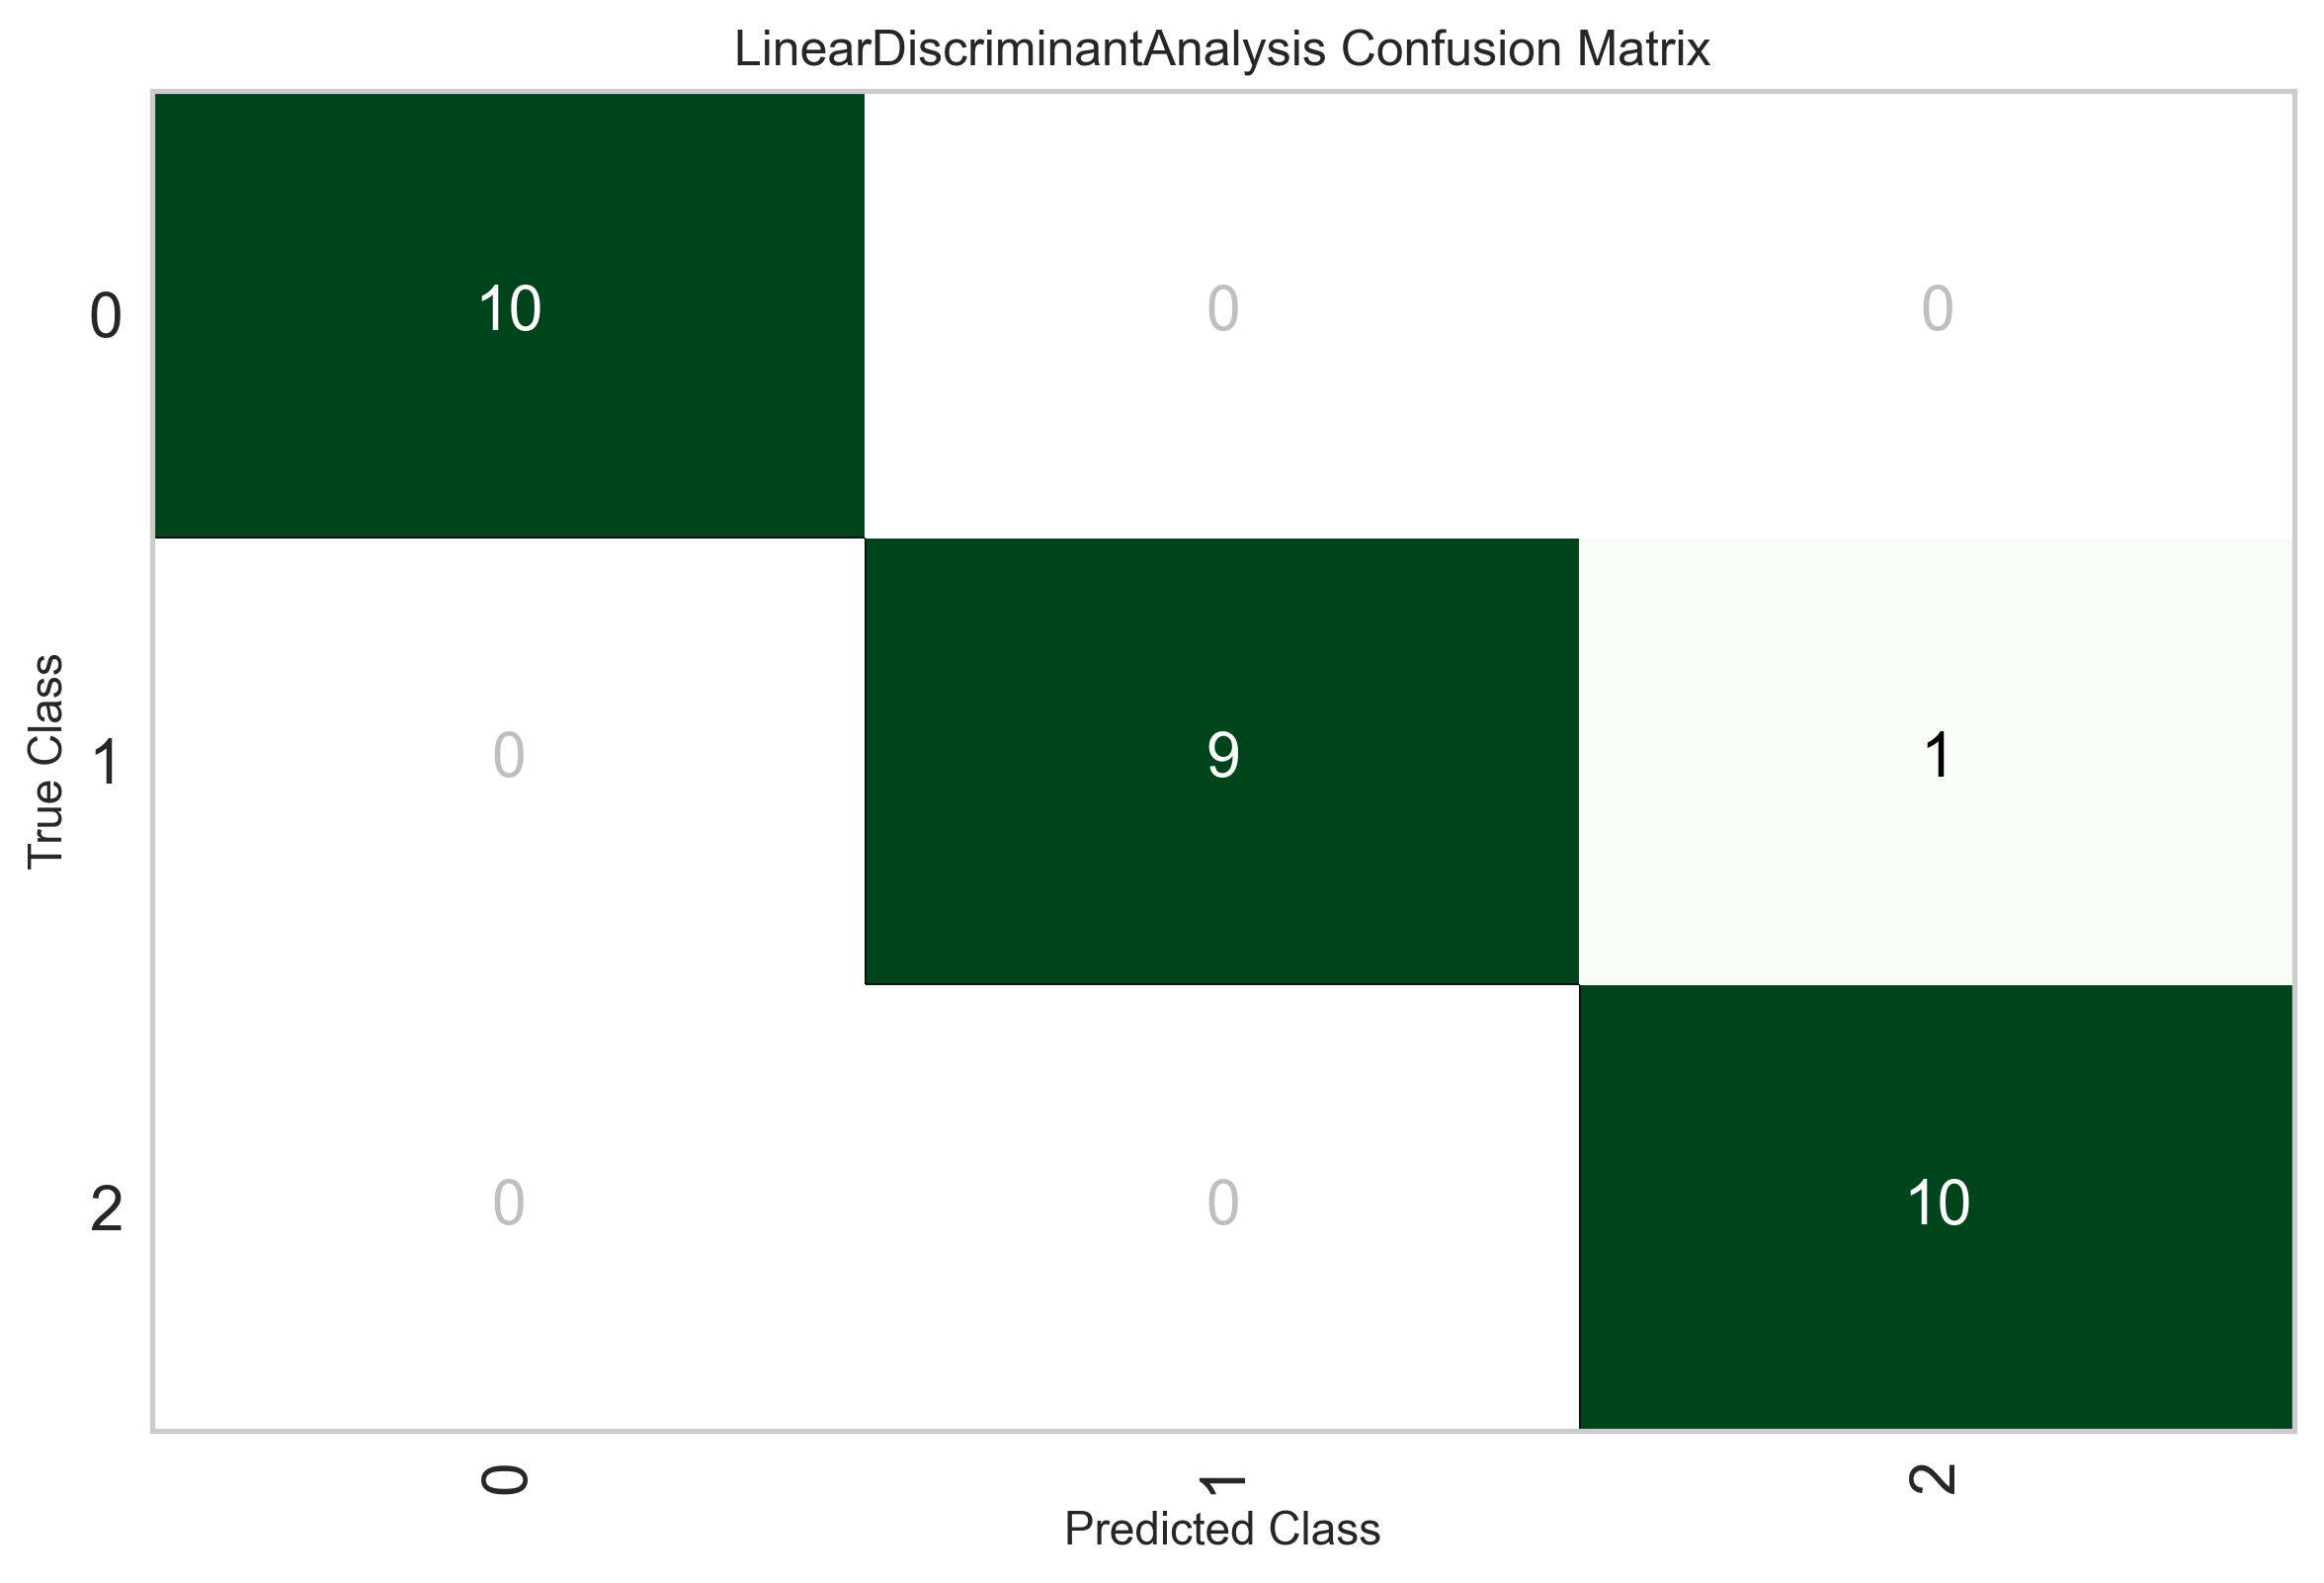

In [13]:
plot_model(model, 'confusion_matrix')

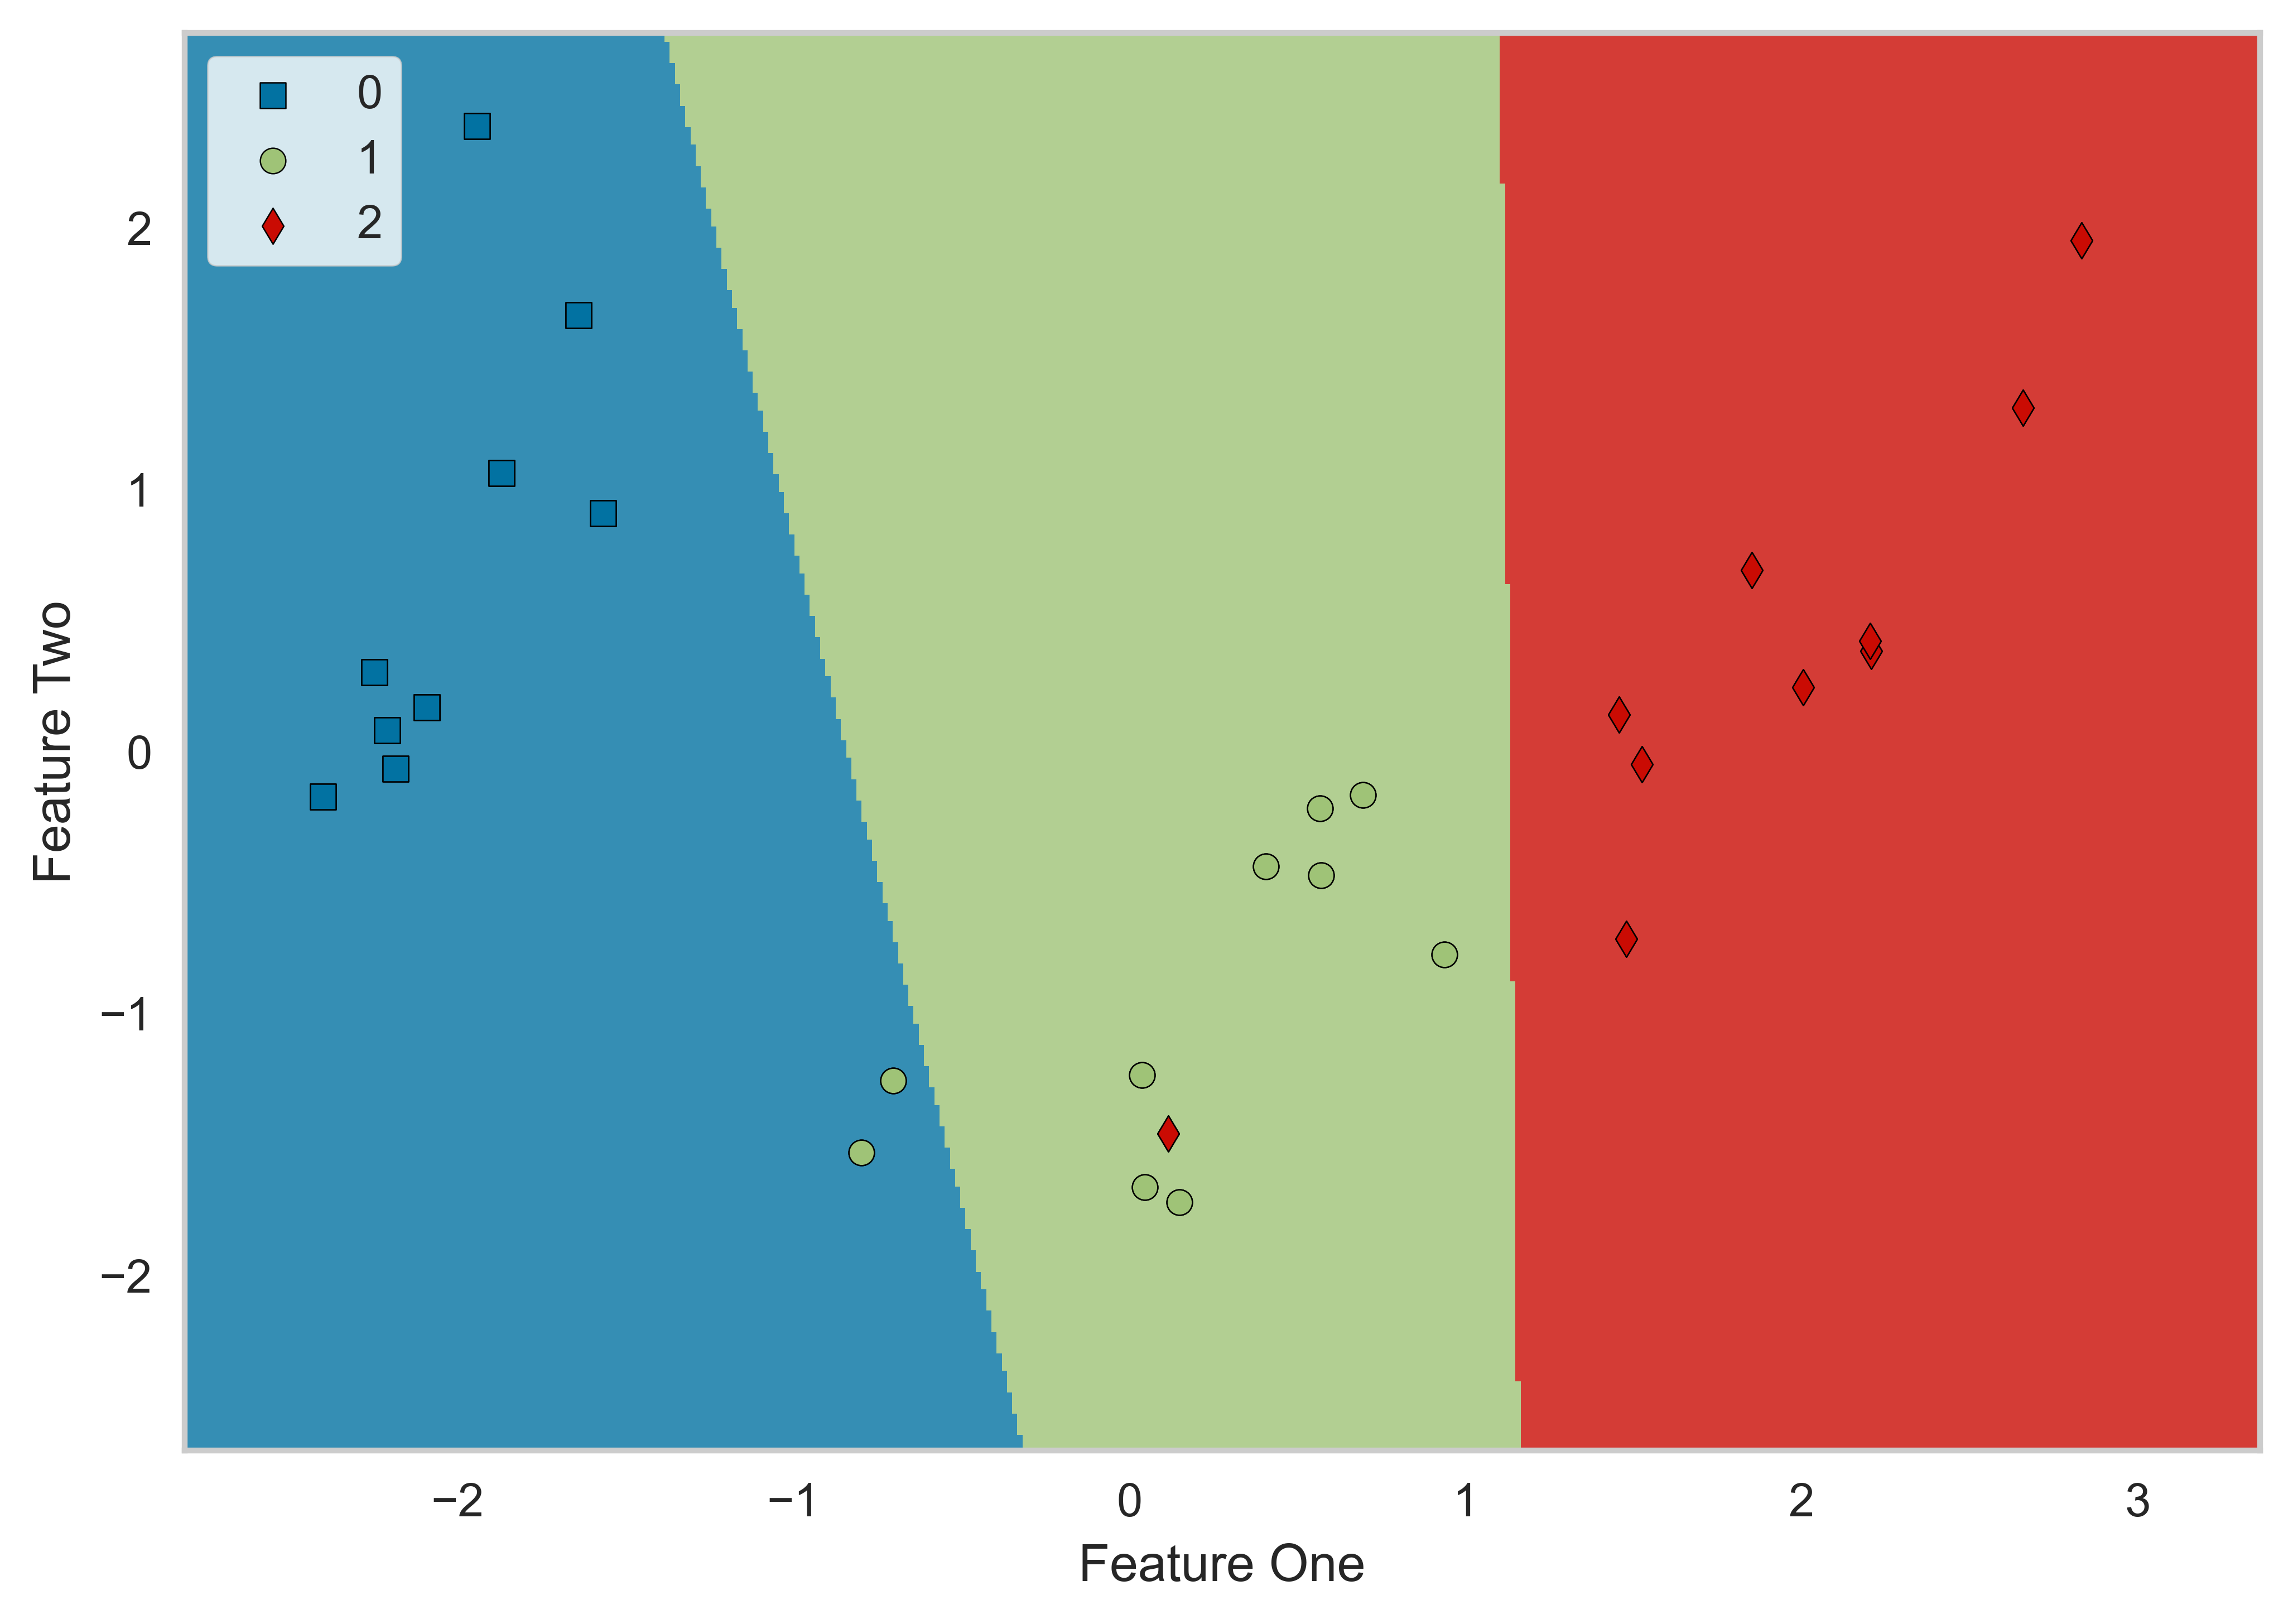

In [14]:
plot_model(model, 'boundary', scale = 2)

### Finalizing and Saving the Model

In [15]:
final_model = finalize_model(model)

save_model(final_model, 'classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\jtoli\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=F...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('normalize',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=StandardScaler(copy=True,
                                                       